# Machine Learning using Scikit-learn and Air Sensor Data

Scikit-learn will take hours to install. It can be installed on the Red Pitaya from the Linux command line using the following commands:

`apt-get install python3-sklearn python-seaborn`

`pip install cython==0.29.19 scikit-learn==0.22 seaborn==0.9`

Simplilearn’s Python tutorial video https://www.youtube.com/watch?v=0Lt9w-BxKFQ

The dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime, date
%matplotlib inline

In [5]:
filename = str(date.today()) + " data.csv"


In [6]:
headers = ["PM 0.3","PM 0.5","PM 1.0","PM 2.5","PM 5.0","PM 10.0","Temp","Pressure","Humidity","CO2",
           "BME680 VOC","QM9 VOC","MiCS5524 VOC","CCS811 VOC","Date"]
try:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    df = pd.read_csv(filename, parse_dates=['Date'], date_parser=dateparse,index_col=0)
    df
except:
    print("Reading Data Failed.")

In [7]:
df.head()

,PM 0.3,PM 0.5,PM 1.0,PM 2.5,PM 5.0,PM 10.0,Temp,Pressure,Humidity,CO2,BME680 VOC,QM9 VOC,MiCS5524 VOC,CCS811 VOC,Date
0,426,106,17,2,0,0,27.90,1011.50,38.00,400,2.98,564,40,0,2020-06-03 16:23:11.653966
0,417,106,17,2,0,0,27.93,1011.50,37.71,417,4.15,559,42,2,2020-06-03 16:23:45.290923
0,327,82,10,2,0,0,27.96,1011.48,37.57,420,5.64,554,42,3,2020-06-03 16:23:59.261634
0,327,82,10,2,0,0,27.99,1011.48,37.34,424,7.08,552,44,3,2020-06-03 16:24:22.698525
0,360,88,27,2,2,2,28.82,1011.42,33.55,408,12.23,489,42,1,2020-06-03 16:31:45.375307


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 0
Data columns (total 15 columns):
PM 0.3          107 non-null int64
PM 0.5          107 non-null int64
PM 1.0          107 non-null int64
PM 2.5          107 non-null int64
PM 5.0          107 non-null int64
PM 10.0         107 non-null int64
Temp            107 non-null float64
Pressure        107 non-null float64
Humidity        107 non-null float64
CO2             107 non-null int64
BME680 VOC      107 non-null float64
QM9 VOC         107 non-null int64
MiCS5524 VOC    107 non-null int64
CCS811 VOC      107 non-null int64
Date            107 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 13.4 KB


In [5]:
#Preprocess data
bins = (2, 6.5, 8)
group_names = ['air','alcohol']
df['smell'] = pd.cut(wine['smell'],bins = bins, labels = group_names)
df['smell'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [6]:
label_object = LabelEncoder()

In [7]:
wine['smell'] = label_quality.fit_transform(wine['quality'])

In [8]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,0


In [9]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

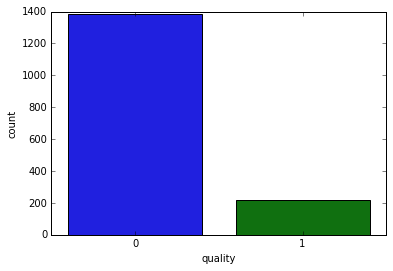

In [10]:
sns.countplot(wine['quality'])

In [11]:
#Seperate the dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [12]:
#Train and test the splitting of data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Applying standard scalling to get an optimum result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

## Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [16]:
#Testing the model
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[264   9]
 [ 23  24]]


## SVM Classifier

In [17]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [18]:
#Testing the model
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


## Neural Network

In [30]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

In [31]:
#Testing the model
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       273
           1       0.62      0.64      0.63        47

    accuracy                           0.89       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.89      0.89      0.89       320

[[255  18]
 [ 17  30]]


In [21]:
cm = accuracy_score(y_test, pred_rfc)
cm

0.90000000000000002

In [22]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,0


In [23]:
#Test the Random Forest Classifier (the best) on a new wine
Xnew = [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])

## Prediction Probabilities

In [38]:
r_probs = [0 for _ in range(len(y_test))]
rfc_probs = ynew = rfc.predict_proba(X_test)
mlpc_probs = pred_mlpc=mlpc.predict_proba(X_test)

## Calculate AUROC
ROC is the reciever operating characteristic AUROC is the area under the ROC curve.

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
mlpc_auc = roc_auc_score(y_test, mlpc_probs)

ValueError: bad input shape (320, 2)